In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
sp = pd.read_csv('./datasets/sp500.csv')

In [3]:
sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4304880000
1,2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3706620000
2,2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4336660000
3,2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5076590000
4,2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,1922.030029,4664940000


In [4]:
pred = np.load('./best_predict.npy')

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
close = np.array(sp['Close'])[:pred.size]

In [49]:
scaler = MinMaxScaler(feature_range=(np.amin(close), np.amax(close)))

In [50]:
pred = scaler.fit_transform(pred.reshape(-1,1))

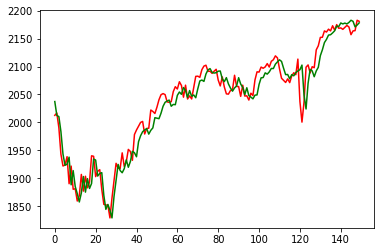

In [58]:
plt.plot(close, color='r')
plt.plot(pred, color='g')

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
mse = mean_squared_error(close, pred)

In [54]:
math.sqrt(mse)

22.818279934662296

In [73]:
def mape(close, pred):
    l = []
    lclose = list(close)
    lpred = list(pred)
    for i in range(len(lclose)):
        l.append(((lclose[i] - lpred[i])/lclose[i])[0])
    return(np.mean(np.array(l))*100)

In [74]:
mape(close, pred)

0.22327287327982728